# Set up of AWAKEN neutral case for AMR-Wind

In [1]:
# Load the modules
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/ascldap/users/lcheung/wind_uq/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

# Load the libraries
import amrwind_frontend as amrwind
import matplotlib.pyplot    as plt

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
# Start the case
case = amrwind.MyApp.init_nogui()

In [3]:
turbinetype = case.get_default_turbinetypedict()

turbinetype['turbinetype_name'] = 'GE127Temp'
turbinetype['Actuator_type']    = 'UniformCtDisk'
turbinetype['Actuator_rotor_diameter']     = 127.0
turbinetype['Actuator_hub_height']         = 90.0
turbinetype['Actuator_epsilon']            = [2.5]
turbinetype['Actuator_output_frequency']   = 1
turbinetype['Actuator_diameters_to_sample']= 5.0 
turbinetype['Actuator_num_points_r']       = 20
turbinetype['Actuator_num_points_t']       = 3
turbinetype['Actuator_thrust_coeff']       = 0.2
case.add_populatefromdict('listboxturbinetype', turbinetype)

In [4]:
# Set the time constants
case.setAMRWindInput('time.stop_time', 20000.0)
case.setAMRWindInput('time.max_step',  80000)

case.setAMRWindInput('time.fixed_dt',  0.25)
case.setAMRWindInput('time.checkpoint_interval',  4000)

In [5]:
# Set some basic parameters
case.setAMRWindInput('incflo.physics',      ['ABL'])
case.setAMRWindInput('incflo.verbose',      3)
case.setAMRWindInput('io.check_file',       'chk')

case.setAMRWindInput('incflo.use_godunov',  True)
case.setAMRWindInput('incflo.godunov_type', 'weno_z')

case.setAMRWindInput('turbulence.model',    ['OneEqKsgsM84'])
case.setAMRWindInput('TKE.source_terms',    ['KsgsM84Src'])

case.setAMRWindInput('transport.viscosity', 1.642E-5)
case.setAMRWindInput('incflo.density',      1.08812) 

In [6]:
# Set some tolerances
tols = """
nodal_proj.mg_rtol                       = 1e-06               
nodal_proj.mg_atol                       = 1e-12               
mac_proj.mg_rtol                         = 1e-06               
mac_proj.mg_atol                         = 1e-12               
diffusion.mg_rtol                        = 1e-06               
diffusion.mg_atol                        = 1e-12               
temperature_diffusion.mg_rtol            = 1e-10               
temperature_diffusion.mg_atol            = 1e-13               
"""
case.loadAMRWindInput(tols, string=True);

In [7]:
case.setAMRWindInput('geometry.prob_lo', [   0.0,    0.0, 0.0 ])
case.setAMRWindInput('geometry.prob_hi', [5120.0, 5120.0, 960.0])
case.setAMRWindInput('amr.n_cell',       [512,    512,    96])

In [8]:
case.setAMRWindInput('is_periodicx', True)
case.setAMRWindInput('is_periodicy', True)
case.setAMRWindInput('is_periodicz', False)

case.setAMRWindInput('zlo.type',              'wall_model')          
case.setAMRWindInput('zlo.temperature_type',  'wall_model')          
case.setAMRWindInput('zlo.tke_type',          'zero_gradient')       
case.setAMRWindInput('zhi.type',              'slip_wall')           
case.setAMRWindInput('zhi.temperature_type',  'fixed_gradient')      
case.setAMRWindInput('zhi.temperature',       0.003) 

In [9]:
case.setAMRWindInput('ICNS.source_terms',     ['ABLForcing','BoussinesqBuoyancy', 'CoriolisForcing', 'ABLMeanBoussinesq'])

case.setAMRWindInput('ABL.stats_output_frequency',   1)                   
case.setAMRWindInput('ABL.stats_output_format',      'netcdf')

case.setAMRWindInput('incflo.velocity',     [6.265, 0.0, 0.0])
case.setAMRWindInput('ABLForcing.abl_forcing_height',   90)
case.setAMRWindInput('ABL.kappa',                       0.4) 

case.setAMRWindInput('ABL.normal_direction',      2)
case.setAMRWindInput('ABL.surface_roughness_z0',  0.03)
case.setAMRWindInput('ABL.reference_temperature', 305.0)
case.setAMRWindInput('ABL.surface_temp_rate',     0.0)
case.setAMRWindInput('ABL.surface_temp_flux',     0.0)

case.setAMRWindInput('ABL.mo_beta_m',             16.0)
case.setAMRWindInput('ABL.mo_gamma_m',            5.0)
case.setAMRWindInput('ABL.mo_gamma_h',            5.0)
case.setAMRWindInput('ABL.random_gauss_mean',     0.0)
case.setAMRWindInput('ABL.random_gauss_var',      1.0)

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()


In [10]:
case.setAMRWindInput('CoriolisForcing.latitude',  36.57236455833334)
case.setAMRWindInput('BoussinesqBuoyancy.reference_temperature', 305.0) 

case.setAMRWindInput('ABL.temperature_heights', '0     650.0 750.0 1000.0')
case.setAMRWindInput('ABL.temperature_values',  '305, 305, 313.0, 313.75')

In [11]:
# This is a case where we don't want to use the defaults in amrwind-frontend
case.setAMRWindInput('ABL.perturb_ref_height', 50.0)
case.setAMRWindInput('ABL.Uperiods', 4.0)
case.setAMRWindInput('ABL.Vperiods', 4.0)
case.setAMRWindInput('ABL.deltaU',   1.0)
case.setAMRWindInput('ABL.deltaV',   1.0)
case.setAMRWindInput('ABL.theta_amplitude',   None)
case.setAMRWindInput('ABL.cutoff_height',   None)
case.setAMRWindInput('ABL.perturb_temperature',   True)
case.setAMRWindInput('ABL.perturb_velocity',      True)

In [12]:
case.setAMRWindInput('time.plot_interval',        2000)

## Define refinement zones

In [13]:
# Add the turbine specifications flag
## Note that the options field can have things like:
##    ADparam_TwrAero:False ADparam_TwrShadow:0 FSTparam_TMax:181234.0
## To specify changes to the OpenFAST model
turbinescsv="""
# CSV file should have columns with
# name, x,    y,    type, yaw, hubheight, options
T0,     2000, 2560, GE127Temp, 270.0, , 
"""
case.setAMRWindInput('turbines_csvtextbox',  turbinescsv)
print(case.getAMRWindInput('turbines_csvtextbox'))


# CSV file should have columns with
# name, x,    y,    type, yaw, hubheight, options
T0,     2000, 2560, GE127Temp, 270.0, , 



In [14]:
case.setAMRWindInput('turbines_deleteprev', True)
case.setAMRWindInput('turbines_freespace', False)   # Make this have no ground
case.setAMRWindInput('turbines_createnewdomain', False)

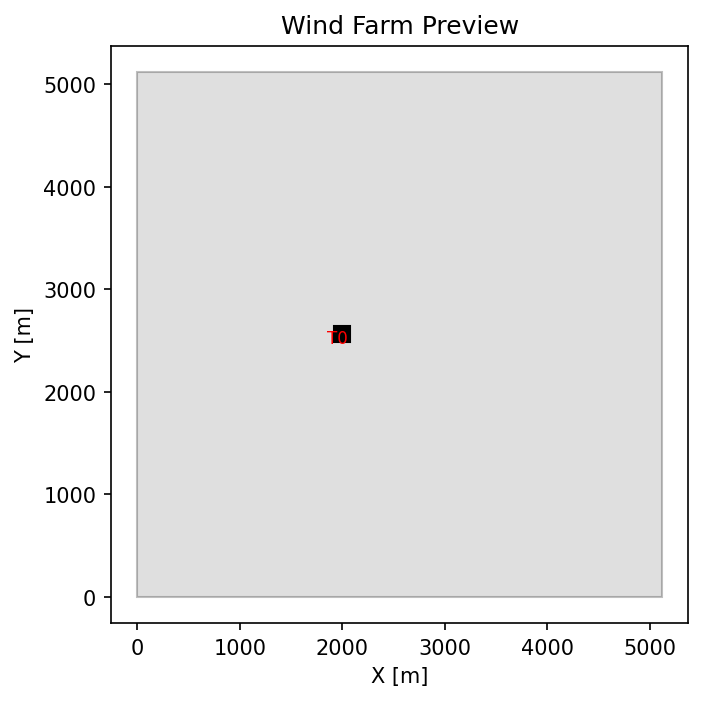

In [15]:
# Preview the turbine layout
fig, ax = plt.subplots(figsize=(5,5), facecolor='w', dpi=150)
case.turbines_previewAllTurbines(ax=ax)

In [16]:
# Now create the turbines
case.turbines_createAllTurbines()

# Print out existing list of turbines, just to confirm that the turbines got made
print(case.listboxpopupwindict['listboxactuator'].getitemlist())

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()
['T0']


In [17]:
#0,     1750,     2000,       500,     50,   100,   center:specified centerx:2000 centery:2500 centerz:90 units:meter    # (5m mesh)
refinementcsv="""
# CSV file should have columns with
# level, upstream, downstream, lateral, below, above, options
level, upstream, downstream, lateral, below, above, options
0,     10,     17,           6,       0.75,   4,    # (5m mesh)
1,     5,      15,           1.5,       0.75,   1.2,  # (2.5m mesh)
"""
case.setAMRWindInput('refine_csvtextbox', refinementcsv)
case.setAMRWindInput('refine_deleteprev', True)

In [18]:
case.refine_createAllZones()
# Print out existing list of turbines
print(case.listboxpopupwindict['listboxtagging'].getitemlist())

['T0_level_0_zone', 'T0_level_1_zone']


## Plot stuff out

In [19]:
# Set up averaging
pprosetup = case.get_default_postprosetupdict()
pprosetup['postprocessing_setup_name'] = 'sampling_'
pprosetup['postprocessing_setup_type'] = 'Sampling'
pprosetup['postprocessing_setup_output_frequency'] =  1000
pprosetup['postprocessing_setup_fields']           =  ['velocity', 'temperature','tke']
case.add_postprosetup(pprosetup, verbose=True)


sampleplane = case.get_default_samplingdict()
# Modify the geometry
sampleplane['sampling_name']         = 'XYslice'
sampleplane['sampling_outputto']     = 'sampling_'
sampleplane['sampling_type']         = 'PlaneSampler'
sampleplane['sampling_p_num_points'] = [513, 513]
sampleplane['sampling_p_origin']     = [0, 0, 0]
sampleplane['sampling_p_axis1']      = [5120, 0, 0]
sampleplane['sampling_p_axis2']      = [0, 5120, 0]
sampleplane['sampling_p_normal']     = [0, 0, 1]
sampleplane['sampling_p_offsets']    = '90.0'
case.add_sampling(sampleplane)

postprocessing_setup_name: 'sampling_'
postprocessing_setup_type: 'Sampling'
postprocessing_setup_output_frequency: 1000
postprocessing_setup_fields: ['velocity', 'temperature', 'tke']
postprocessing_setup_averaging_window: None
postprocessing_setup_averaging_start_time: None
postprocessing_setup_averaging_stop_time: None


In [20]:
outputoptions="outputvars:velocity;tke;temperature outputfreq:10"

turbsamplingcsv = """
# CSV file should have columns withturbinescsv=
# name, type, upstream, downstream, lateral, below, above, n1, n2, options
name,      type,       upstream, downstream, lateral, below, above, n1, n2, options
turbhh,    hubheight,  10,       20,         3,       0,     0,     11, 11, usedx:0.05 outputto:turbhh_ orientation:nacdir {outputoptions}
sw,        streamwise, 10,       20,         0,       0.7,   1,     11, 11, usedx:0.05 outputto:turbsw  orientation:nacdir {outputoptions}
rotor,     rotorplane, 10,       20,         3,       ,      1,     11, 11, usedx:0.1  outputto:rotor_  orientation:nacdir outputvars:velocity noffsets:16  {outputoptions}
""".format(outputoptions=outputoptions)

case.setAMRWindInput('sampling_csvtextbox', turbsamplingcsv)
case.setAMRWindInput('sampling_deleteprev', False)
case.sampling_createAllProbes(verbose=True)

{'sampling_outputto': ['turbhh_'], 'sampling_name': 'T0_turbhh', 'sampling_type': 'PlaneSampler', 'sampling_p_num_points': [601, 121], 'sampling_p_origin': array([ 730., 2179.,   90.]), 'sampling_p_axis1': array([3810.,    0.,    0.]), 'sampling_p_axis2': array([ -0., 762.,  -0.])}
sampling_outputto: ['turbhh_']
sampling_name: 'T0_turbhh'
sampling_type: 'PlaneSampler'
sampling_p_num_points: [601, 121]
sampling_p_origin: array([ 730., 2179.,   90.])
sampling_p_axis1: array([3810.,    0.,    0.])
sampling_p_axis2: array([ -0., 762.,  -0.])
{'sampling_outputto': ['turbsw'], 'sampling_name': 'T0_sw', 'sampling_type': 'PlaneSampler', 'sampling_p_num_points': [601, 35], 'sampling_p_origin': array([7.30e+02, 2.56e+03, 1.10e+00]), 'sampling_p_axis1': array([3810.,    0.,    0.]), 'sampling_p_axis2': array([  0. ,   0. , 215.9])}
sampling_outputto: ['turbsw']
sampling_name: 'T0_sw'
sampling_type: 'PlaneSampler'
sampling_p_num_points: [601, 35]
sampling_p_origin: array([7.30e+02, 2.56e+03, 1.10e

## Plot the domain

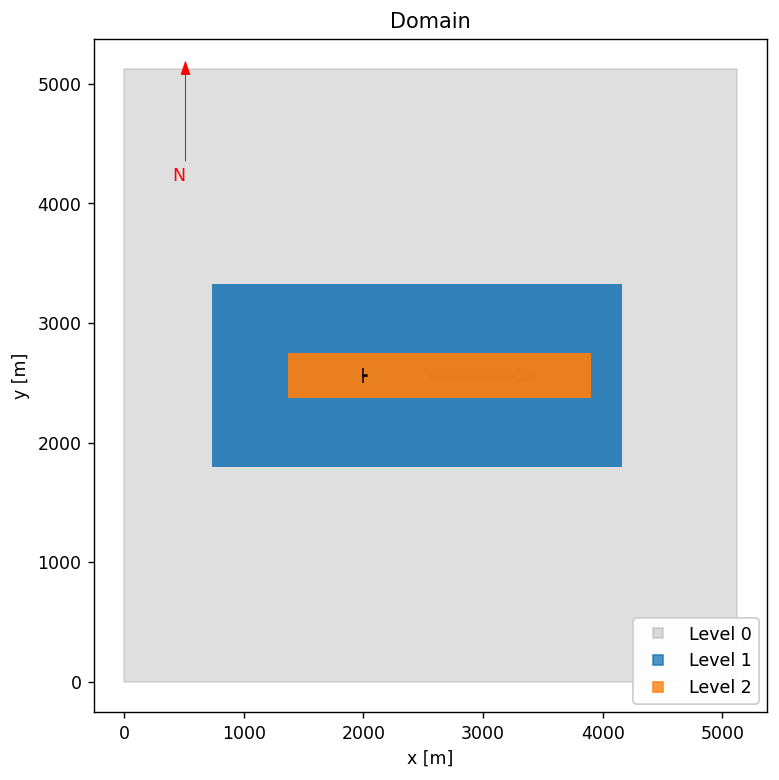

In [21]:
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = [] #case.listboxpopupwindict['listboxsampling'].getitemlist() #['p_hub']
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY' 
case.popup_storteddata['plotdomain']['plot_sampleprobes_style'] = "{'ms':0.5, 'marker':'.', 'linestyle':'None'}"
case.plotDomain(ax=ax)

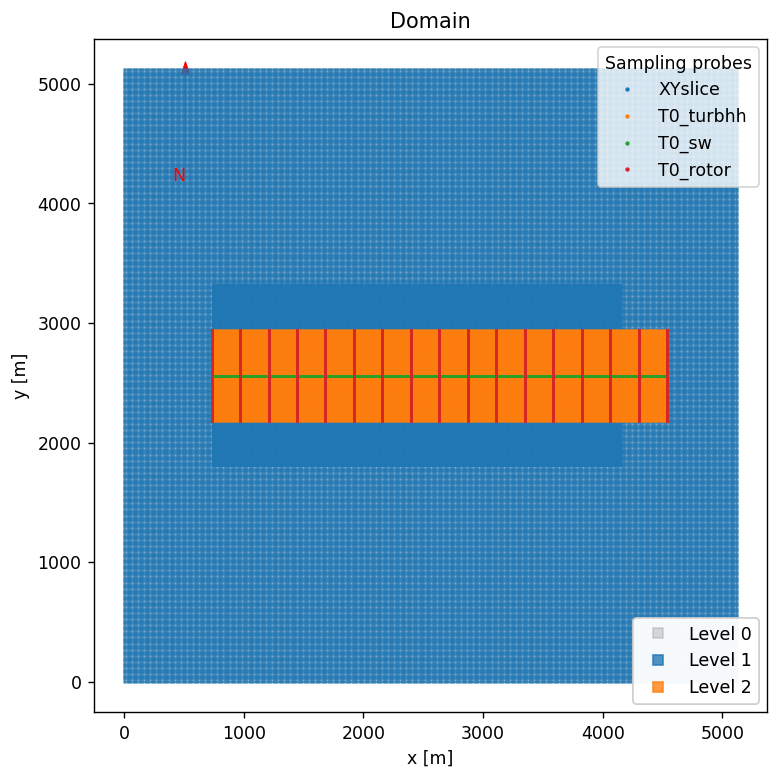

In [22]:
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = case.listboxpopupwindict['listboxsampling'].getitemlist() #['p_hub']
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY' 
case.popup_storteddata['plotdomain']['plot_sampleprobes_style'] = "{'ms':0.5, 'marker':'.', 'linestyle':'None'}"
case.plotDomain(ax=ax)

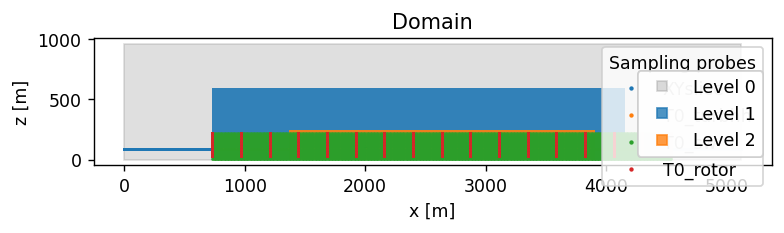

In [23]:
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = case.listboxpopupwindict['listboxsampling'].getitemlist()
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XZ' 
case.plotDomain(ax=ax)

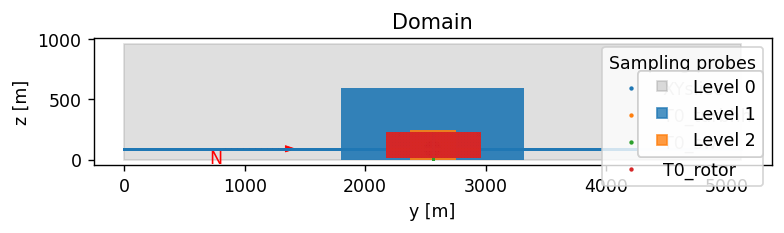

In [24]:
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = case.listboxpopupwindict['listboxsampling'].getitemlist()
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'YZ' 
case.plotDomain(ax=ax)

In [25]:
check=case.validate()

-- Checking inputs --
[ PASS] max_level:           max_level = 2 >= 0
[ PASS] dt & CFL:            DT and CFL OK
[ PASS] Actuator physics:    incflo.physics and ICNS.source_terms OK for Actuators
[ SKIP] Actuator FST:T0      Not OpenFAST
[ SKIP] Sampling probes:     Not active or no sampling planes

Results: 
 3 PASS
 2 SKIP
 0 FAIL
 0 WARN


In [26]:
# This will print out your mesh size & refinements
case.estimateMeshSize()

Refinement T0_level_0_zone: level 1: 25219691 cells
Refinement T0_level_1_zone: level 2: 15338291 cells
ESTIMATED MESH SIZE
   Level       Ncells                      Cell Size
       0     25165824             10.0 x 10.0 x 10.0
       1     25219691                5.0 x 5.0 x 5.0
       2     15338291                2.5 x 2.5 x 2.5
  TOTAL:     65723806


In [27]:
def removeturbines(runcase):
    physics = runcase.getAMRWindInput('incflo.physics')
    if 'Actuator' in physics:
        physics.remove('Actuator')
        runcase.setAMRWindInput('physics', physics)
        print('SET incflo.physics: '+repr(runcase.getAMRWindInput('incflo.physics')))
    runcase.setAMRWindInput('ActuatorForcing', False)    
    runcase.listboxpopupwindict['listboxactuator'].deleteall()
    return

# Delete the turbines (for precursor)
removeturbines(case)

SET incflo.physics: ['ABL']


In [28]:
# Write the input file
print(case.writeAMRWindInput('turbine_5x5.inp'))

# --- Simulation time control parameters ---
time.stop_time                           = 20000.0             # Max (simulated) time to evolve [s]
time.max_step                            = 80000               
time.fixed_dt                            = 0.25                # Fixed timestep size (in seconds). If negative, then time.cfl is used
time.checkpoint_interval                 = 4000                
incflo.physics                           = ABL                 # List of physics models to include in simulation.
incflo.verbose                           = 3                   
io.check_file                            = chk                 
incflo.use_godunov                       = true                
incflo.godunov_type                      = weno_z              
turbulence.model                         = OneEqKsgsM84        
TKE.source_terms                         = KsgsM84Src          
nodal_proj.mg_rtol                       = 1e-06               
nodal_proj.mg_atol             